In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%config InlineBackend.figure_format="retina"
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score               
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
data = pd.read_csv("Data2.csv")
print(data.shape)
data[:5]
df = data.copy()

(720, 4)


In [6]:
df

,Focus,Mag,H-Value,V-Value
0,-2.00,-0.30,0.95,1.497
1,-1.95,-0.30,0.78,1.468
2,-1.90,-0.30,1.02,1.428
3,-1.85,-0.30,0.95,1.419
4,-1.80,-0.30,0.94,1.514
...,...,...,...,...
715,1.75,0.55,0.89,1.140
716,1.80,0.55,0.84,0.984
717,1.85,0.55,0.86,0.998
718,1.90,0.55,0.87,1.051


In [7]:
def cross_validation(model, X, y, cv=5): 
    cv = KFold(5, shuffle=True)
    return cross_val_score(model, X, y, cv=cv).mean().round(4)

In [8]:
y = df['H-Value']

features = df.columns.difference(['Focus','Mag'])
X = df[features]
cont_features = X.columns.difference(['Mag'])
X.loc[:,cont_features] = StandardScaler().fit_transform(X[cont_features])
X_train, X_test, y_train, y_test = train_test_split(X, y)

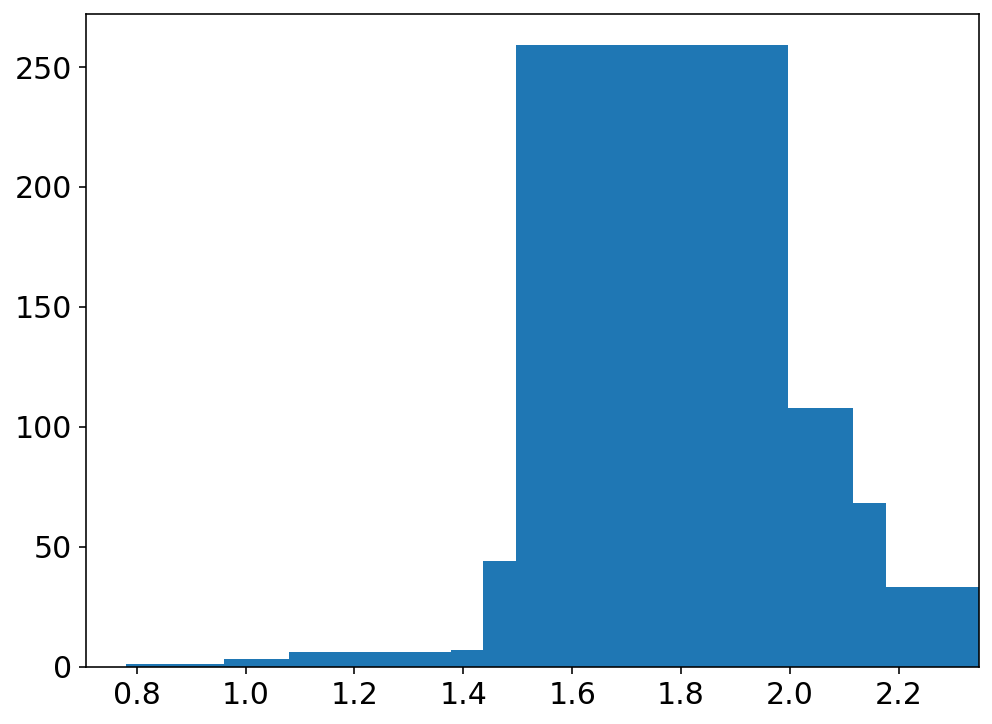

In [9]:
plt.hist(df['V-Value'], bins=25, width=0.5)
plt.show()

In [10]:
df.corr()[:5]

,Focus,Mag,H-Value,V-Value
Focus,1.000000e+00,1.184864e-17,0.138438,0.002772
Mag,1.184864e-17,1.000000e+00,-0.106872,0.030215
H-Value,1.384383e-01,-1.068724e-01,1.000000,0.734214
V-Value,2.772033e-03,3.021516e-02,0.734214,1.000000


<AxesSubplot:>

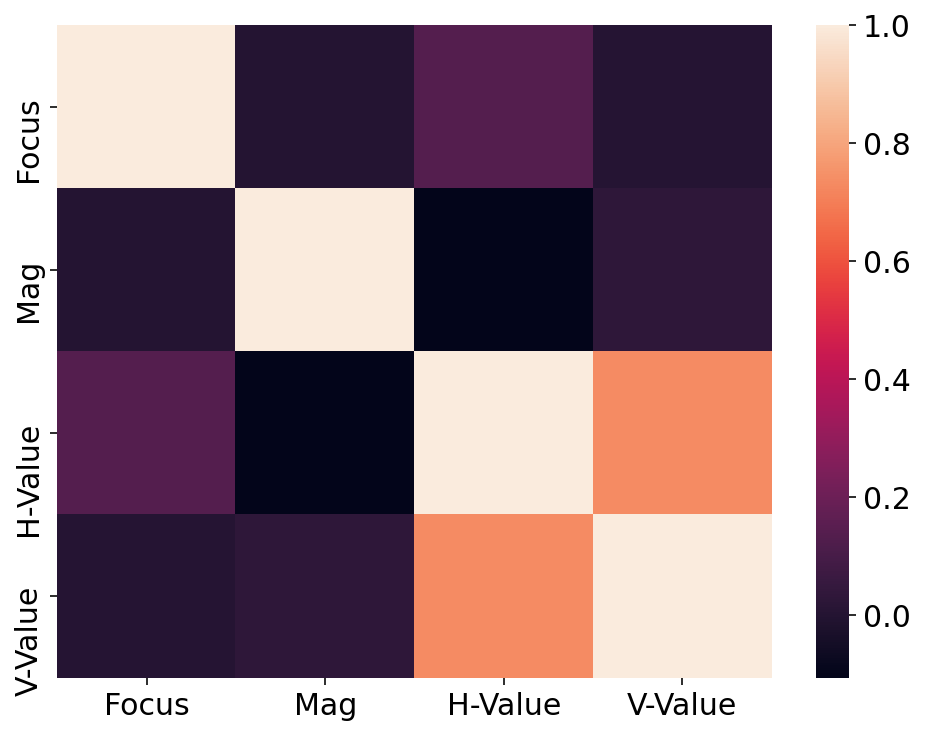

In [11]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

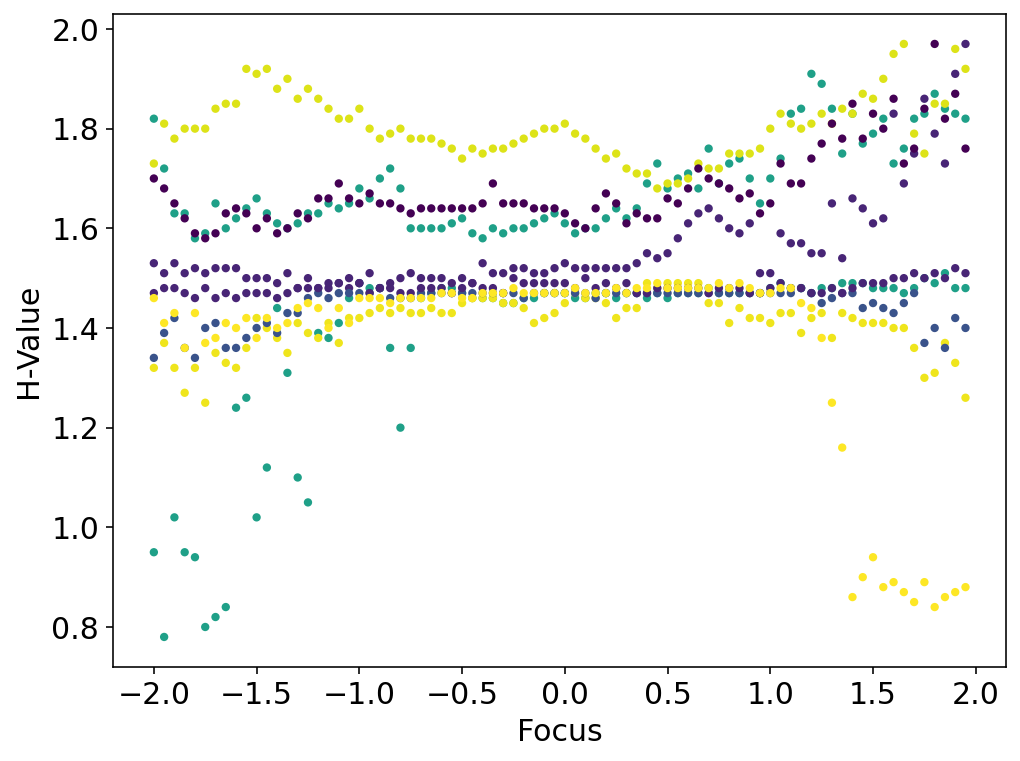

In [12]:
for col in ["Focus"]:
    plt.scatter(df[col] , df['H-Value'], c=df.Mag, s=10)
    plt.ylabel('H-Value')
    plt.xlabel(col)
    plt.show()

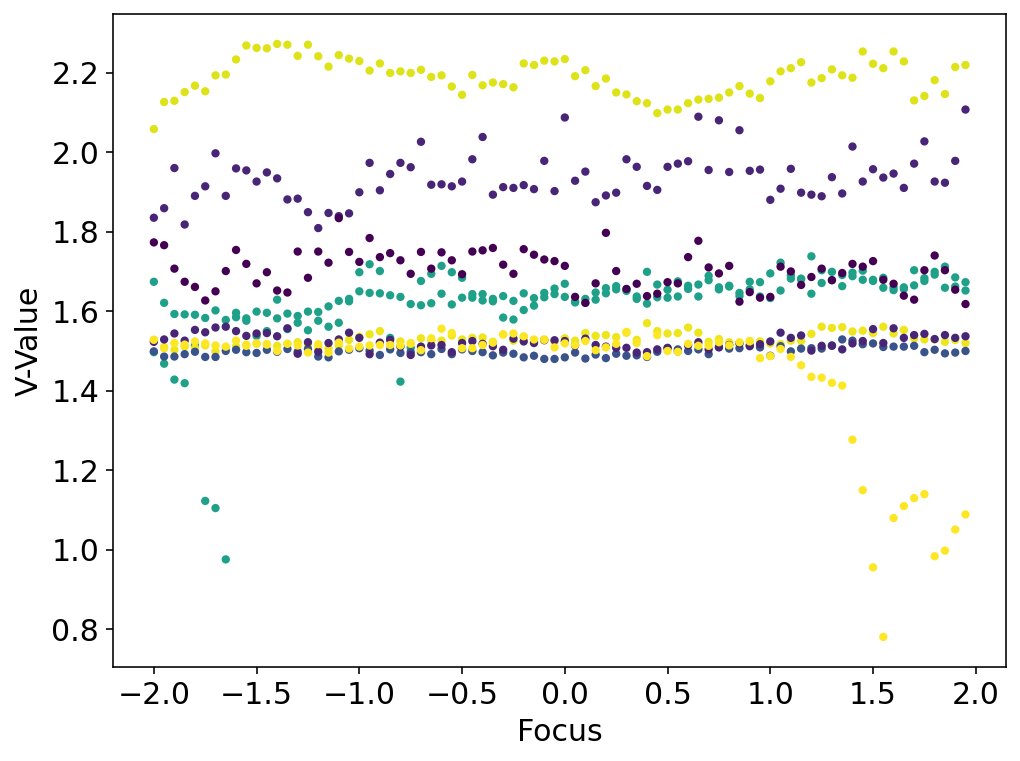

In [13]:
for col in ["Focus"]:
    plt.scatter(df[col] , df['V-Value'], c=df.Mag, s=10)
    plt.ylabel('V-Value')
    plt.xlabel(col)
    plt.show()

In [102]:
X = df[['Focus','Mag']]
y = df["H-Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg.score(X_test, y_test)
a1, a2, b = linear_reg.coef_[0], linear_reg.coef_[1],linear_reg.intercept_
a1, a2, b

(0.01172577749181371, -0.031347224103247084, 1.5176415095561255)

In [103]:
def show_reg_result(y_test,y_pred):
    print("Max Error: ", 
      round((y_test - y_pred).max(),3))
    print("Mean Absolute Error: ", 
      mean_absolute_error(y_test,y_pred).round(3))
    print("Root Mean Squared Error: ", 
      mean_squared_error(y_test,y_pred, squared=False).round(3))
    print("R-Squared: ", 
      r2_score(y_test, y_pred).round(3))
    print("Mean Absolute Percentile Error: ", 
      mean_absolute_percentage_error(y_test,y_pred).round(3))
    print("Percent Estimation: ", 
      (100*(1-mean_absolute_percentage_error(y_test,y_pred))).round(3),'%')

In [104]:
y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.447
Mean Absolute Error:  0.134
Root Mean Squared Error:  0.185
R-Squared:  0.037
Mean Absolute Percentile Error:  0.092
Percent Estimation:  90.839 %


In [17]:
features = data.columns.difference(['Focus', 'Mag'])
features

Index(['H-Value', 'V-Value'], dtype='object')

In [128]:
#선형 회귀 H Value
X = df[['Focus','Mag']]
y = df['H-Value']
poly_reg = PolynomialFeatures(degree=5)
X = poly_reg.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.319
Mean Absolute Error:  0.086
Root Mean Squared Error:  0.123
R-Squared:  0.527
Mean Absolute Percentile Error:  0.058
Percent Estimation:  94.185 %


<AxesSubplot:>

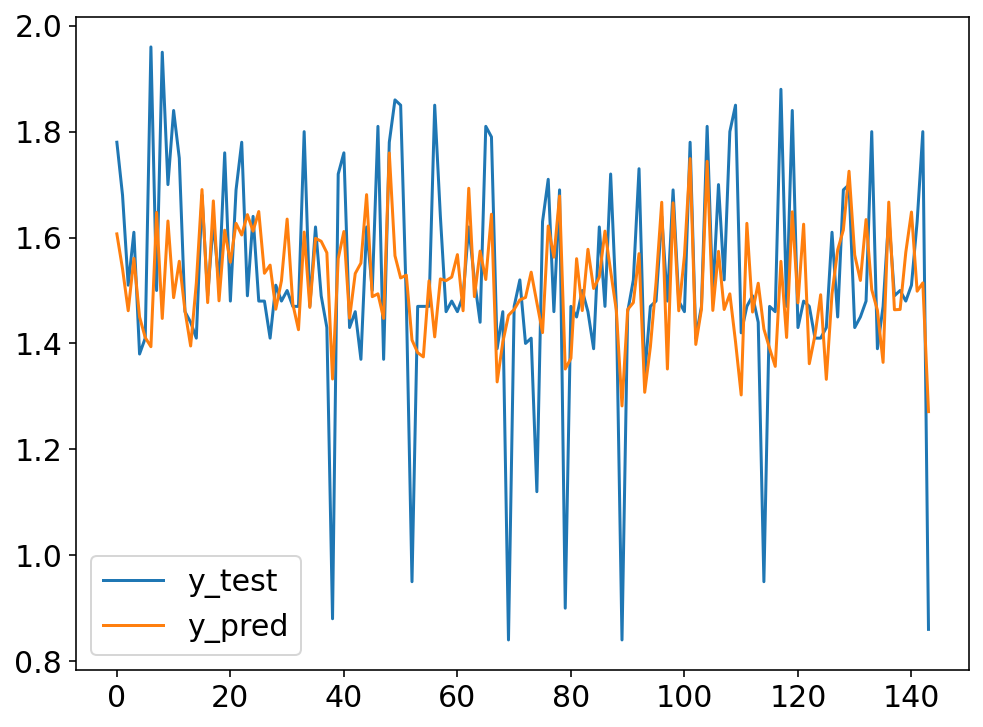

In [110]:
y_pred = linear_reg.predict(X_test)
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [20]:
#선형 회귀 V Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.576
Mean Absolute Error:  0.163
Root Mean Squared Error:  0.219
R-Squared:  -0.007
Mean Absolute Percentile Error:  0.096
Percent Estimation:  90.376 %


<AxesSubplot:>

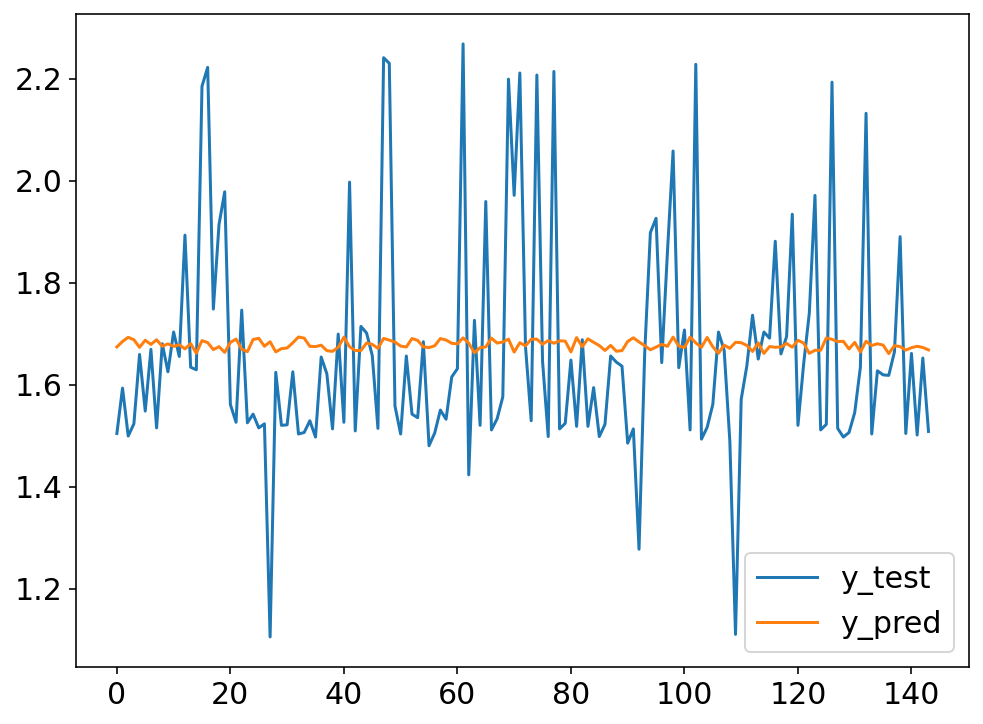

In [21]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [22]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    fig_size= 8
    if len(features) > 30: fig_size=12
    if len(features) > 40: fig_size=18
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(8,fig_size))
    plt.xlabel('Features Importance/Weights')
    plt.gca().legend_ = None

In [23]:
#SVM H Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
svr = SVR(kernel="linear", gamma=10, C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.41
Mean Absolute Error:  0.15
Root Mean Squared Error:  0.191
R-Squared:  0.006
Mean Absolute Percentile Error:  0.102
Percent Estimation:  89.771 %


In [24]:
cross_validation(svr,X,y)

0.0134

<AxesSubplot:>

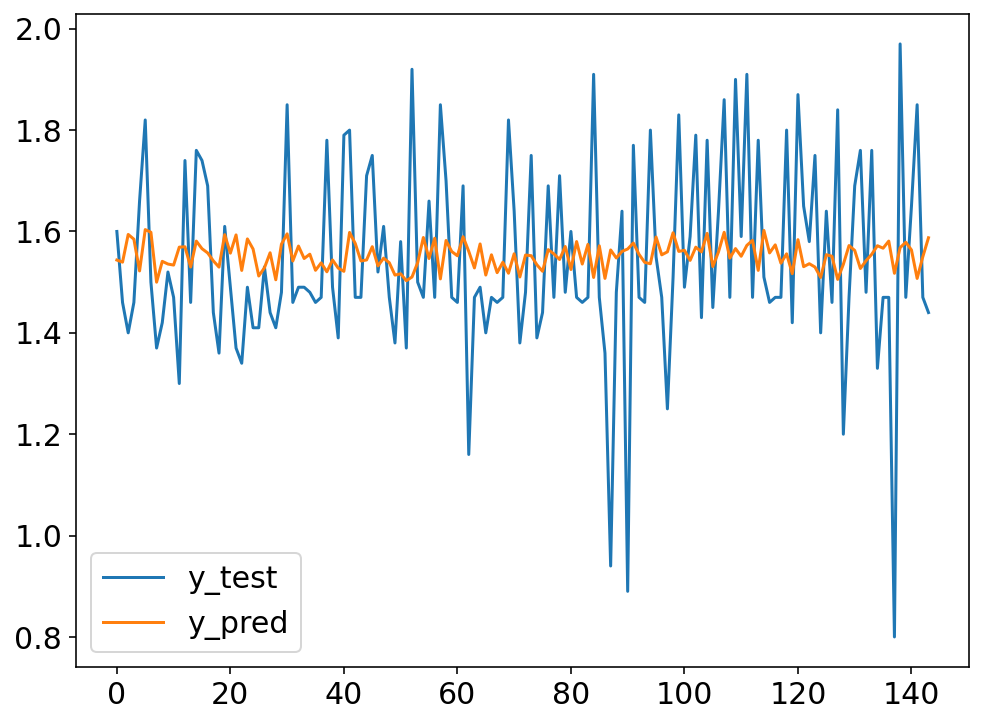

In [25]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [26]:
#SVM V Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
svr = SVR(kernel="linear", gamma=10, C=100)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.652
Mean Absolute Error:  0.169
Root Mean Squared Error:  0.241
R-Squared:  -0.088
Mean Absolute Percentile Error:  0.094
Percent Estimation:  90.621 %


<AxesSubplot:>

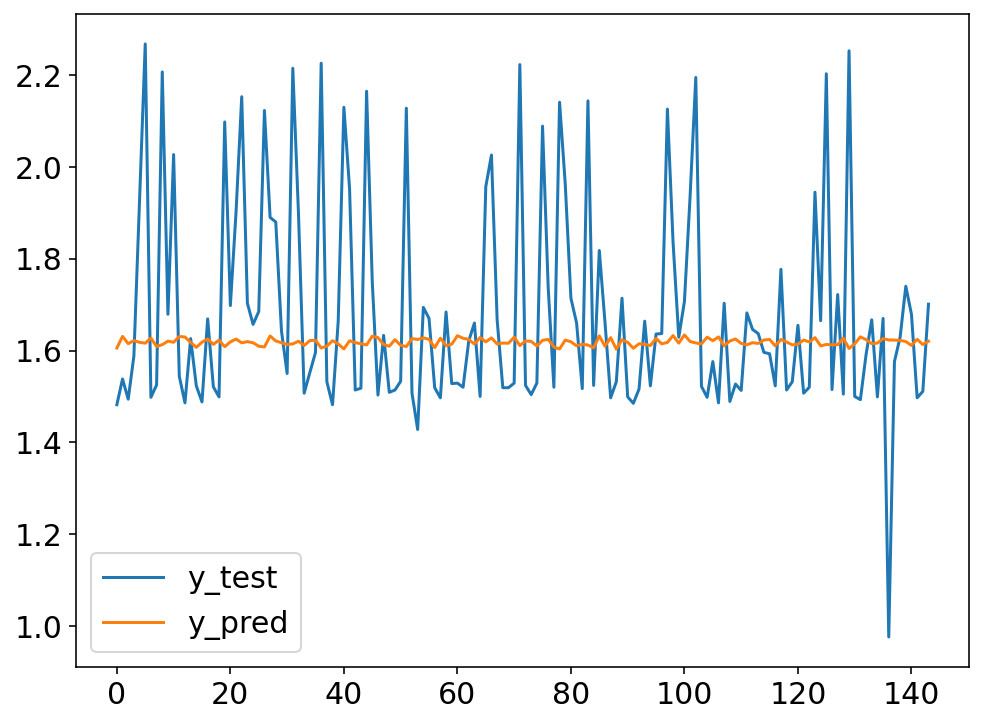

In [27]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [28]:
#Decision Tree H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.39
Mean Absolute Error:  0.076
Root Mean Squared Error:  0.13
R-Squared:  0.468
Mean Absolute Percentile Error:  0.049
Percent Estimation:  95.107 %


In [29]:
cross_validation(dtr,X,y)

0.1084

<AxesSubplot:>

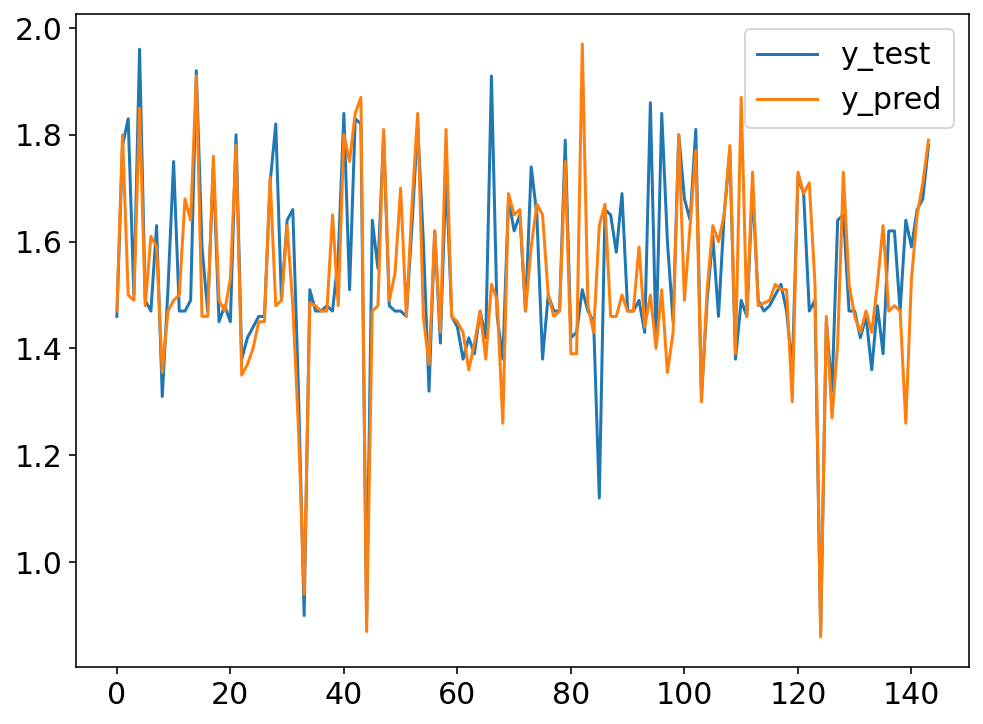

In [30]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

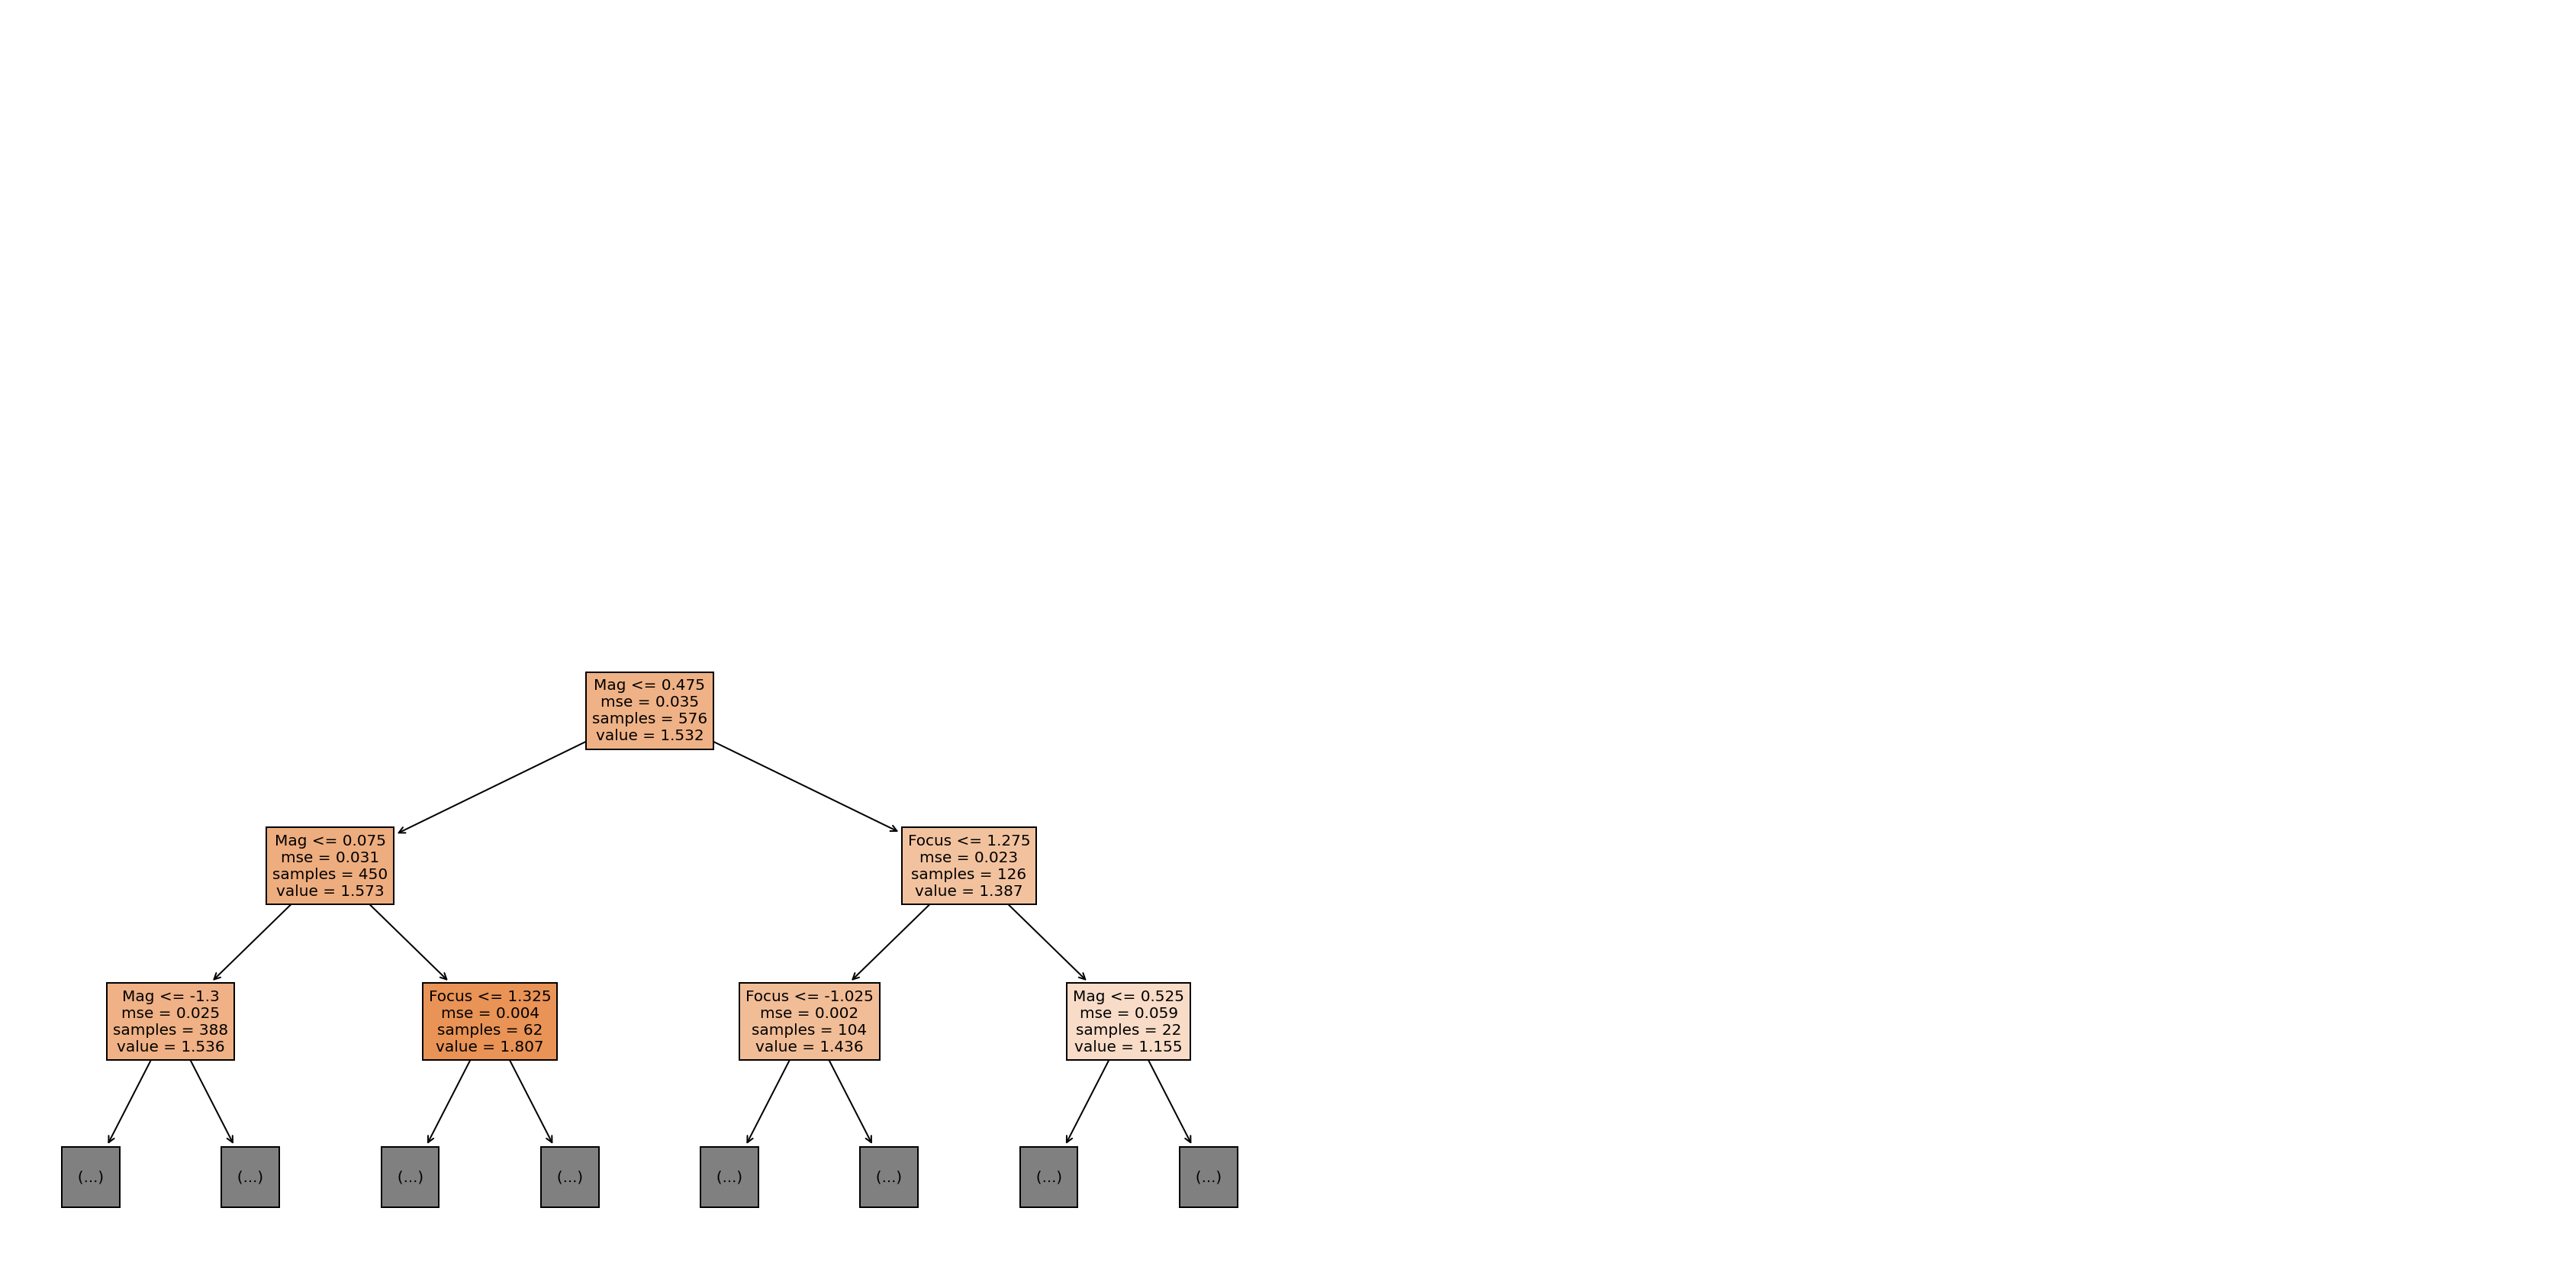

In [31]:
plt.figure(figsize=(30,15))
# plt.rcParams["figure.dpi"] = 200

tree.plot_tree(dtr, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=2)
plt.show()

In [32]:
#Decision Tree V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.52
Mean Absolute Error:  0.099
Root Mean Squared Error:  0.186
R-Squared:  0.341
Mean Absolute Percentile Error:  0.062
Percent Estimation:  93.825 %


<AxesSubplot:>

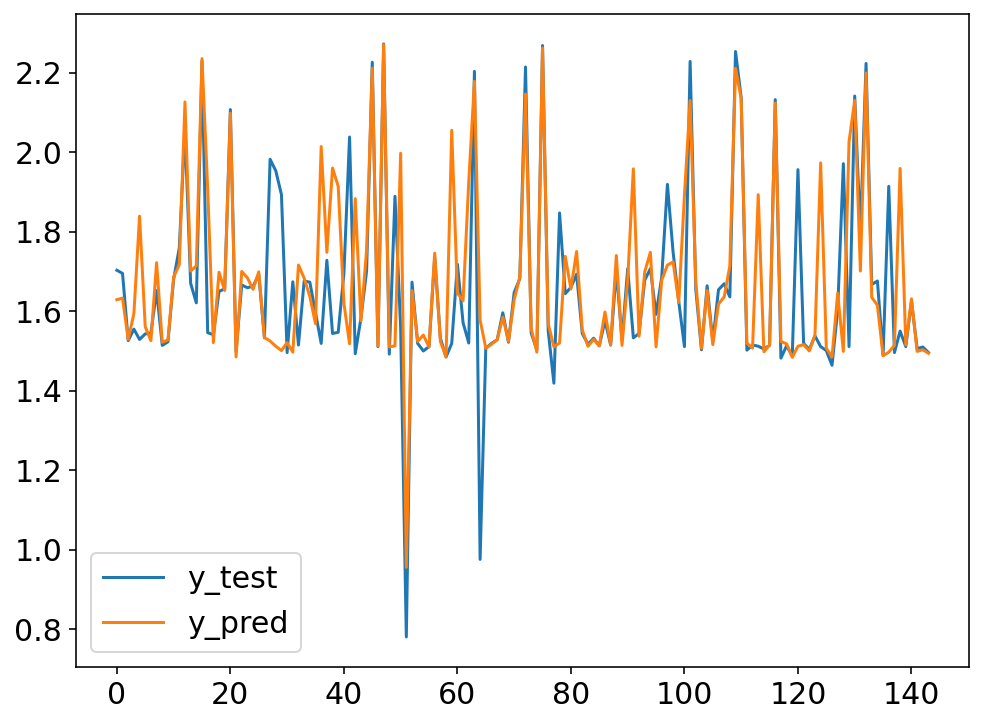

In [33]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [34]:
#랜덤포레스트 H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.544
Mean Absolute Error:  0.065
Root Mean Squared Error:  0.108
R-Squared:  0.626
Mean Absolute Percentile Error:  0.042
Percent Estimation:  95.844 %


In [35]:
cross_validation(rfr,X,y)

0.4411

<AxesSubplot:>

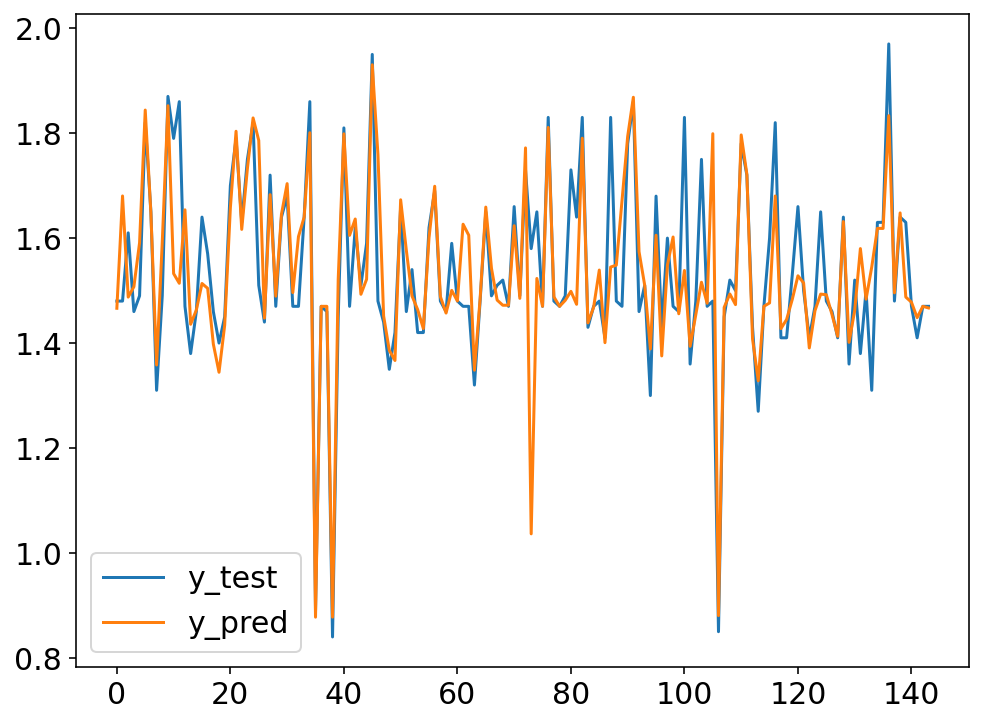

In [36]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [37]:
#랜덤포레스트 V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.555
Mean Absolute Error:  0.064
Root Mean Squared Error:  0.107
R-Squared:  0.63
Mean Absolute Percentile Error:  0.041
Percent Estimation:  95.861 %


<AxesSubplot:>

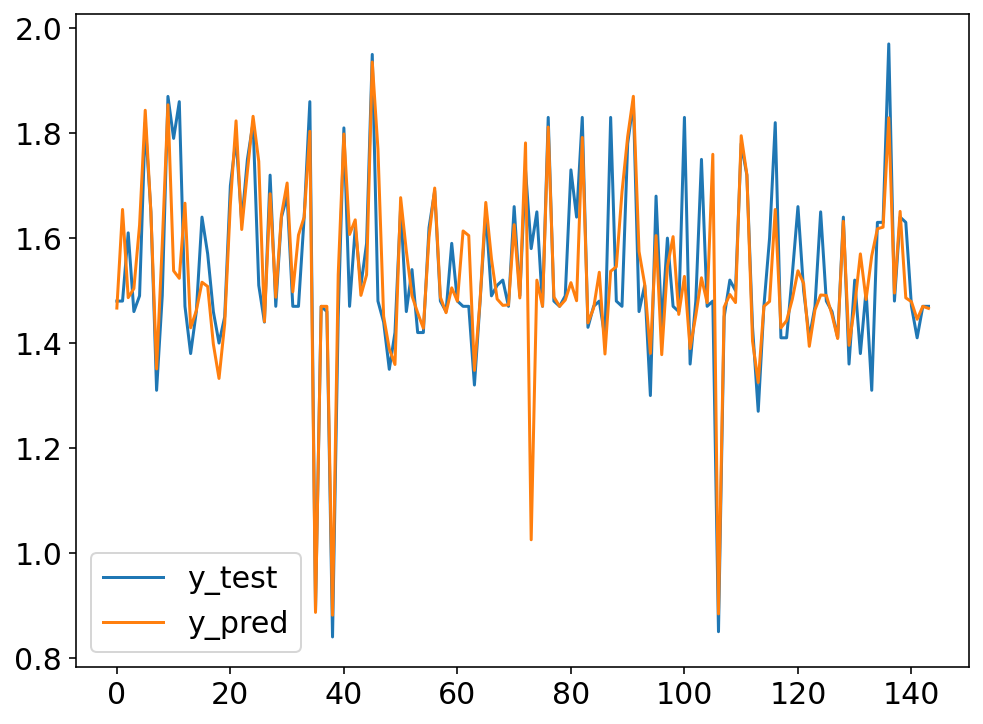

In [38]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [39]:
# LightBGM H-Value
X = df[['Focus','Mag']]
y = df['H-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.268
Mean Absolute Error:  0.063
Root Mean Squared Error:  0.11
R-Squared:  0.641
Mean Absolute Percentile Error:  0.046
Percent Estimation:  95.405 %


In [40]:
cross_validation(lgbm_r,X,y)

0.6451

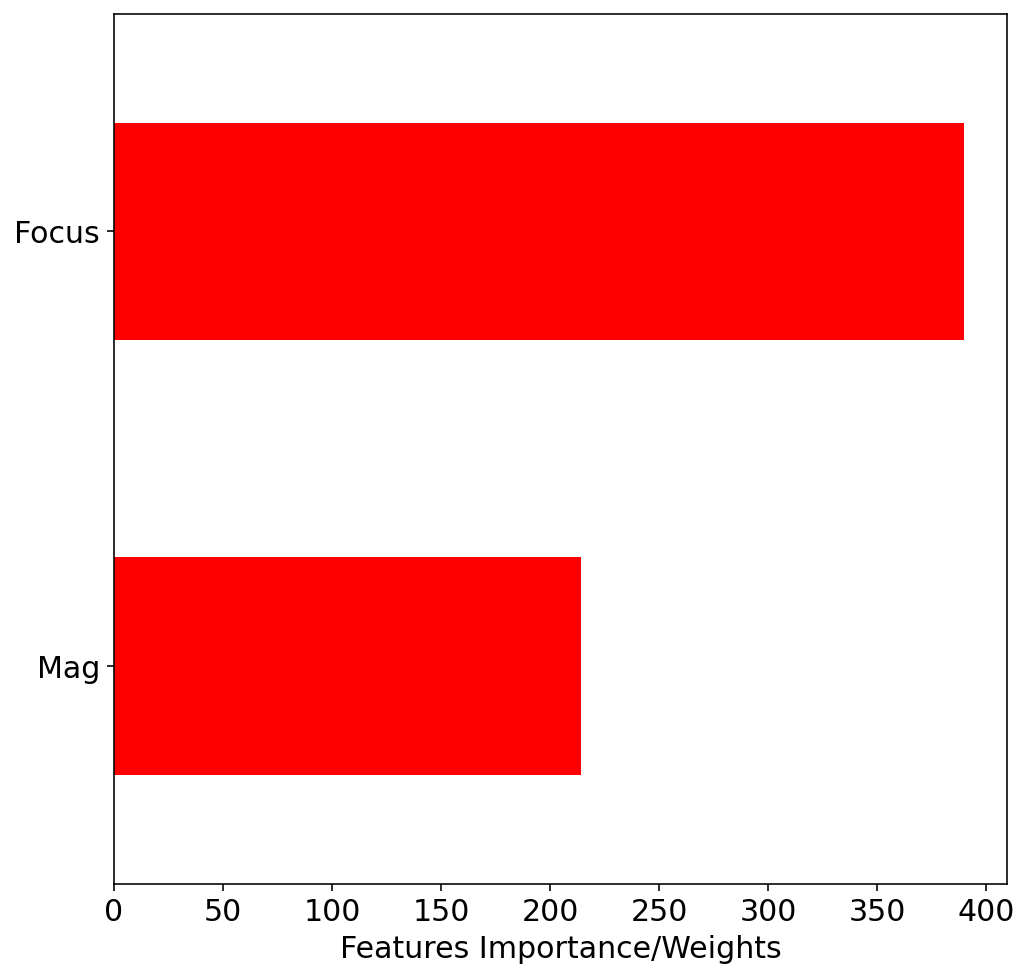

In [41]:
plot_features_weights(X.columns, lgbm_r.feature_importances_)

<AxesSubplot:>

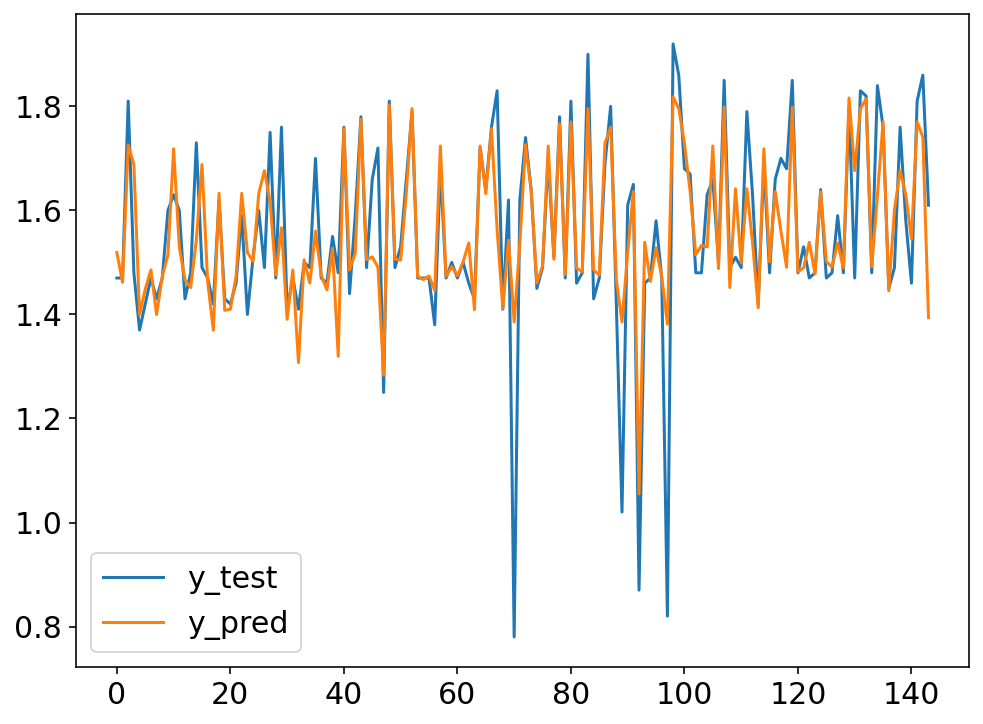

In [42]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [43]:
# LightBGM V-Value
X = df[['Focus','Mag']]
y = df['V-Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

lgbm_r = LGBMRegressor()
lgbm_r.fit(X_train, y_train, eval_set=(X_test, y_test), 
           early_stopping_rounds=5, verbose=False)
y_pred = lgbm_r.predict(X_test)
show_reg_result(y_test,y_pred)

Max Error:  0.357
Mean Absolute Error:  0.063
Root Mean Squared Error:  0.116
R-Squared:  0.802
Mean Absolute Percentile Error:  0.043
Percent Estimation:  95.724 %


<AxesSubplot:>

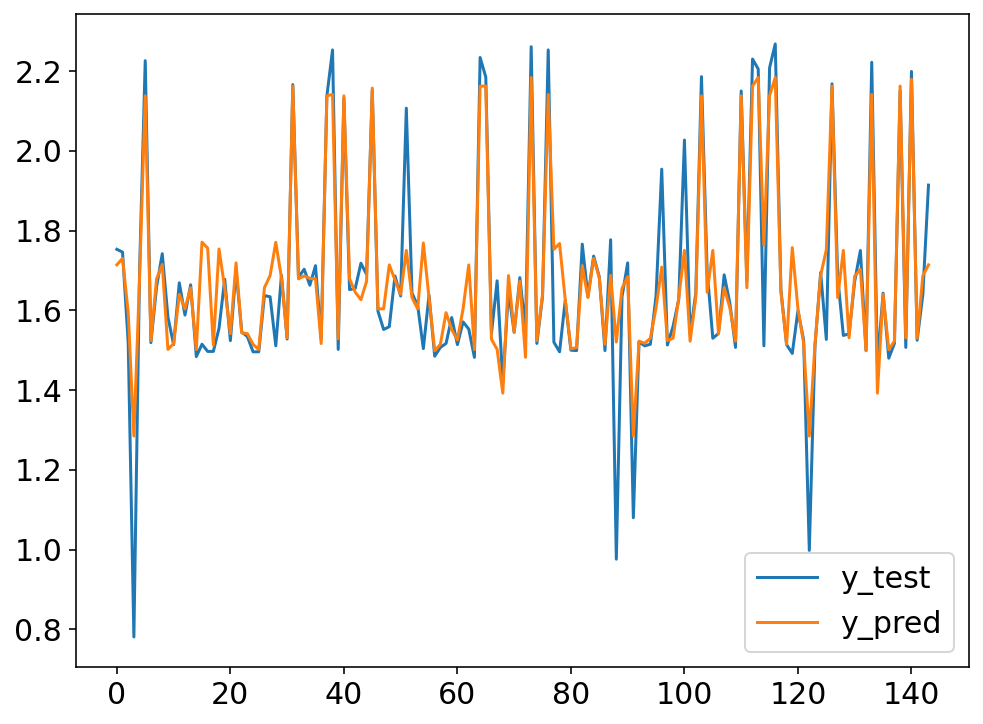

In [44]:
result = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
result.reset_index(drop=True)[:].plot()

In [45]:
#랜덤포레스트 다변수 결과
X = df[['Focus','Mag']]
y = df[['H-Value','V-Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

#각 열 추출해서 R Score값 비교
y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])


print(f"H_Value RMS: {mean_squared_error(y_test['H-Value'], y_pred_H_Value, squared=False).round(3)}")
print(f"V_Value RMS: {mean_squared_error(y_test['V-Value'], y_pred_V_Value, squared=False).round(3)}")

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")


H_Value RMS: 0.159
V_Value RMS: 0.161
H_Value R Score: 0.404
V_Value R Score: 0.578


<AxesSubplot:>

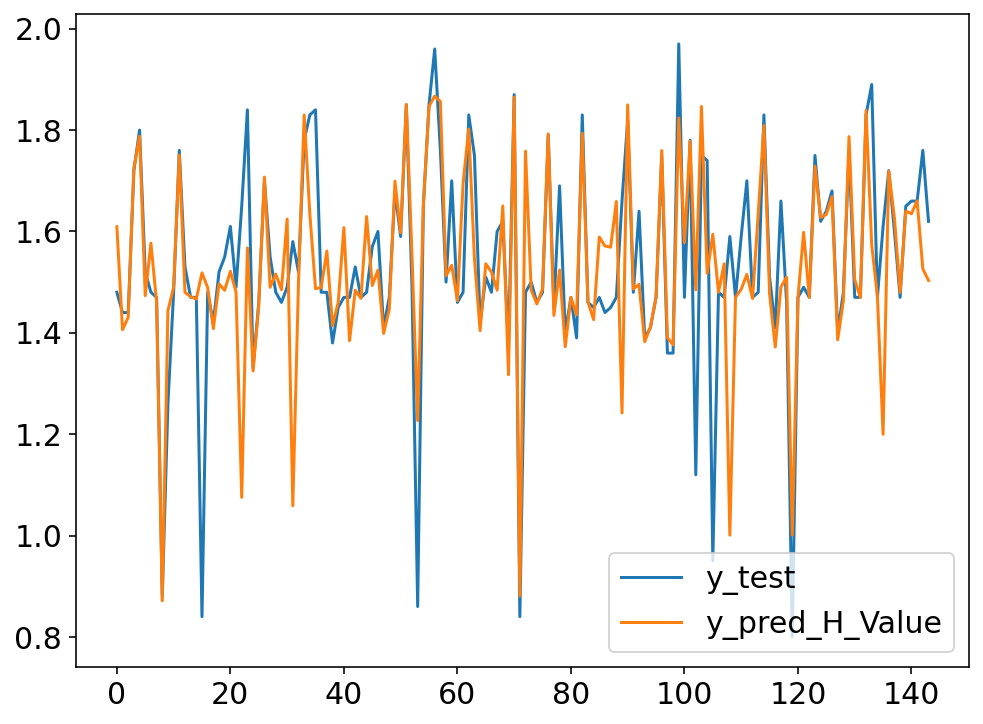

In [46]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

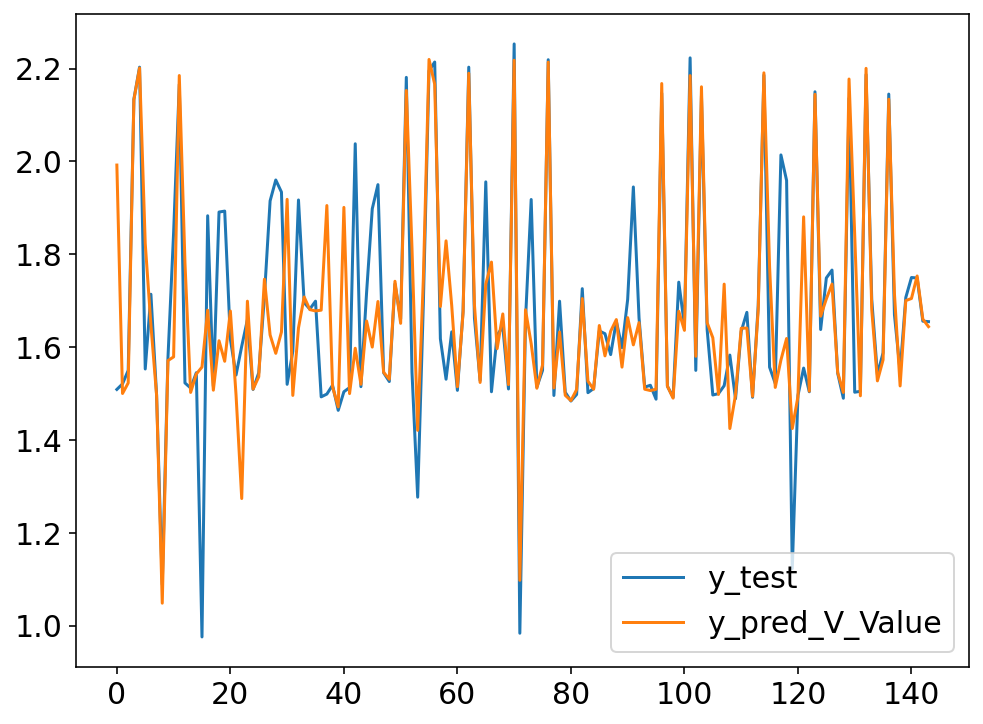

In [47]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()

In [159]:
#랜덤포레스트 튜닝 (다변수)
X = df[['Focus','Mag']]
y = df[['H-Value','V-Value']]
poly_reg = PolynomialFeatures(degree=4)
X = poly_reg.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print(f"Best Param: {grid_cv.best_params_}")
max_depth = grid_cv.best_params_['max_depth']
min_samples_leaf = grid_cv.best_params_['min_samples_leaf']
min_samples_split = grid_cv.best_params_['min_samples_split']
n_estimators = grid_cv.best_params_['n_estimators']


Best Param: {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}


In [160]:
#각 열 추출해서 R Score값 비교
rfr = RandomForestRegressor(n_estimators= n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)

y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])

print(f"H_Value RMS: {mean_squared_error(y_test['H-Value'], y_pred_H_Value, squared=False).round(3)}")
print(f"V_Value RMS: {mean_squared_error(y_test['V-Value'], y_pred_V_Value, squared=False).round(3)}")

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")

H_Value RMS: 0.091
V_Value RMS: 0.109
H_Value R Score: 0.728
V_Value R Score: 0.802


<AxesSubplot:>

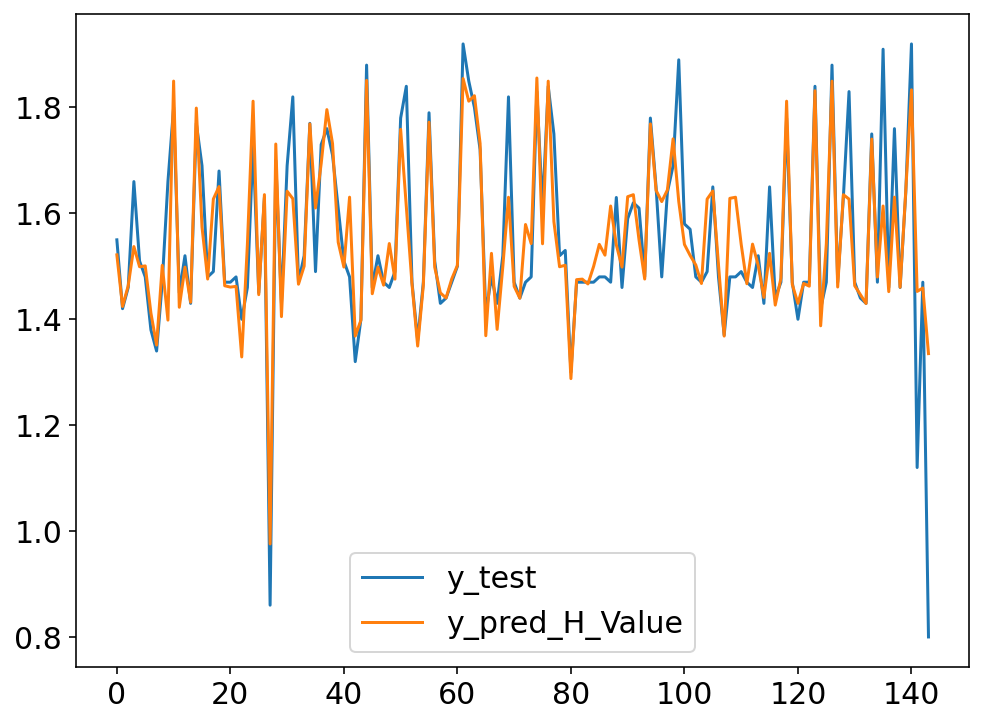

In [162]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

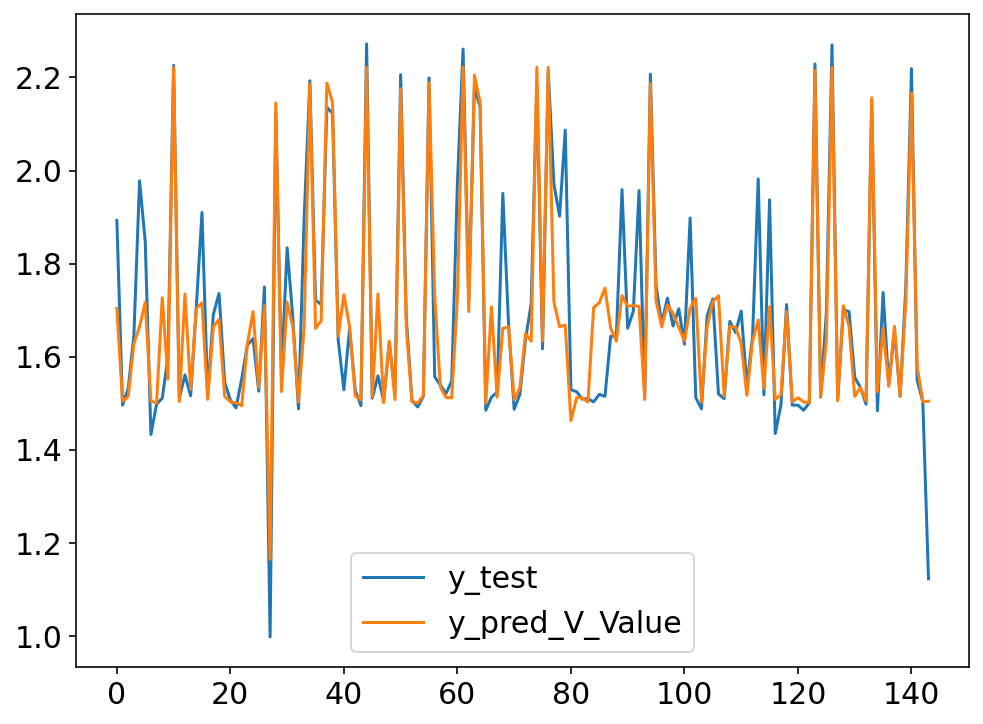

In [165]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()

In [164]:
y_test['y_pred_H_Value'] = y_pred_H_Value
y_test['y_pred_V_Value'] = y_pred_V_Value
print(y_test)

     H-Value  V-Value  y_pred_H_Value  y_pred_V_Value
144     1.55    1.893        1.521628        1.703765
558     1.42    1.496        1.424086        1.504420
667     1.46    1.532        1.463287        1.514749
181     1.66    1.646        1.537270        1.628078
118     1.51    1.978        1.499186        1.664663
..       ...      ...             ...             ...
346     1.64    1.749        1.643464        1.719804
319     1.92    2.219        1.833353        2.166234
11      1.12    1.550        1.452530        1.580070
499     1.47    1.503        1.459077        1.503169
5       0.80    1.123        1.335094        1.504532

[144 rows x 4 columns]


In [52]:
#랜덤포레스트 튜닝 (다변수)  --- 아웃라이어 제거 후 
df2 = df[(df["H-Value"] < 1.8) & (df["H-Value"] > 1.1) & (df["V-Value"] < 1.8) & (df["V-Value"] > 1.1)]
print(len(df2))
X = df2[['Focus','Mag']]
y = df2[['H-Value','V-Value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

params ={
    'n_estimators':[100, 200],
    'max_depth':[6,8,10,12,15],
    'min_samples_leaf':[8,12,18, 22],
    'min_samples_split':[8,16,20, 24]
}

rfr = RandomForestRegressor()
grid_cv = GridSearchCV(rfr, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)
y_pred = grid_cv.predict(X_test)


#각 열 추출해서 R Score값 비교
y_pred_H_Value = []
y_pred_V_Value = []
for row in y_pred:
    y_pred_H_Value.append(row[0])
    y_pred_V_Value.append(row[1])

print(f"H_Value R Score: {r2_score(y_test['H-Value'], y_pred_H_Value).round(3)}")
print(f"V_Value R Score: {r2_score(y_test['V-Value'], y_pred_V_Value).round(3)}")

513
H_Value R Score: 0.285
V_Value R Score: 0.907


<AxesSubplot:>

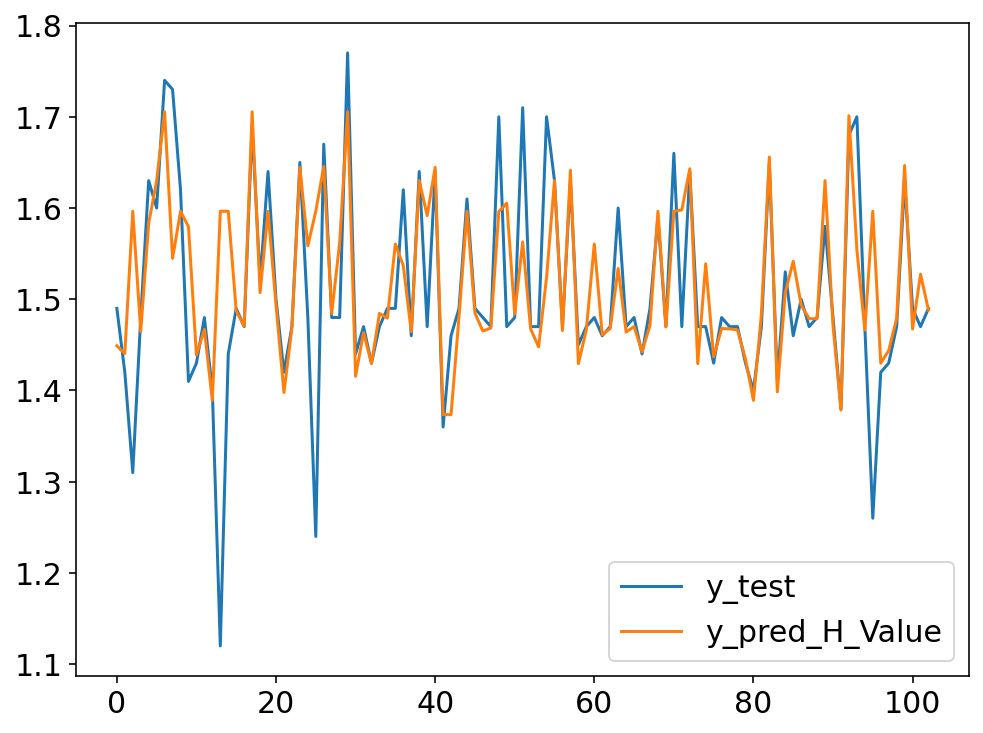

In [53]:
result = pd.DataFrame({'y_test':y_test['H-Value'], 'y_pred_H_Value':y_pred_H_Value})
result.reset_index(drop=True)[:].plot()

<AxesSubplot:>

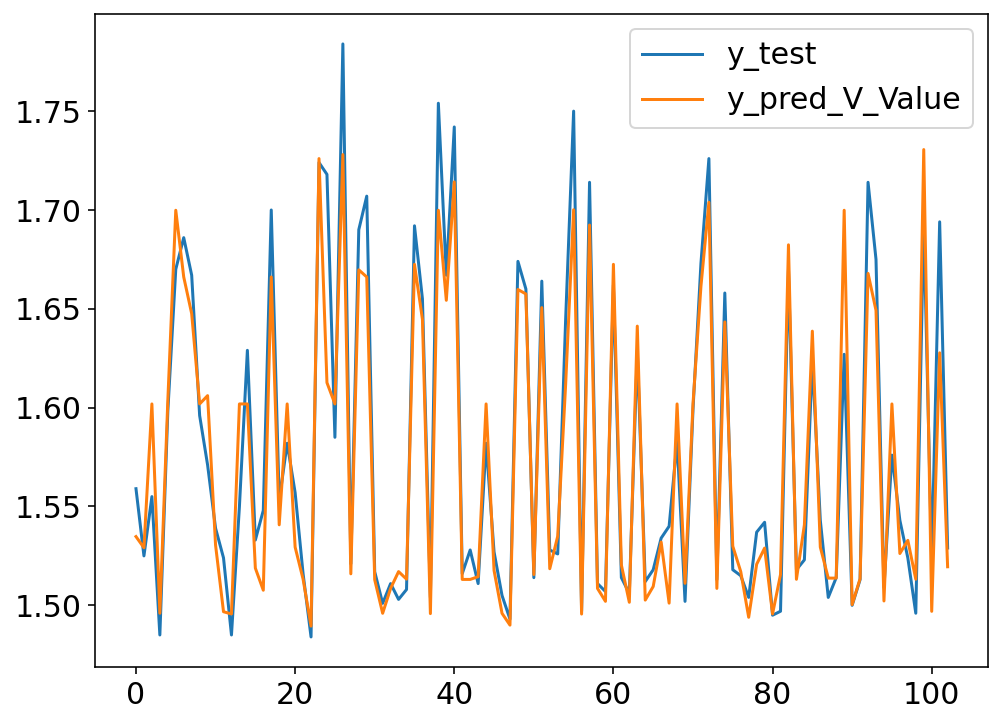

In [54]:
result = pd.DataFrame({'y_test':y_test['V-Value'], 'y_pred_V_Value':y_pred_V_Value})
result.reset_index(drop=True)[:].plot()